<a href="https://colab.research.google.com/github/vikhyath905/California-Housing-Prices/blob/main/1000017770_California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

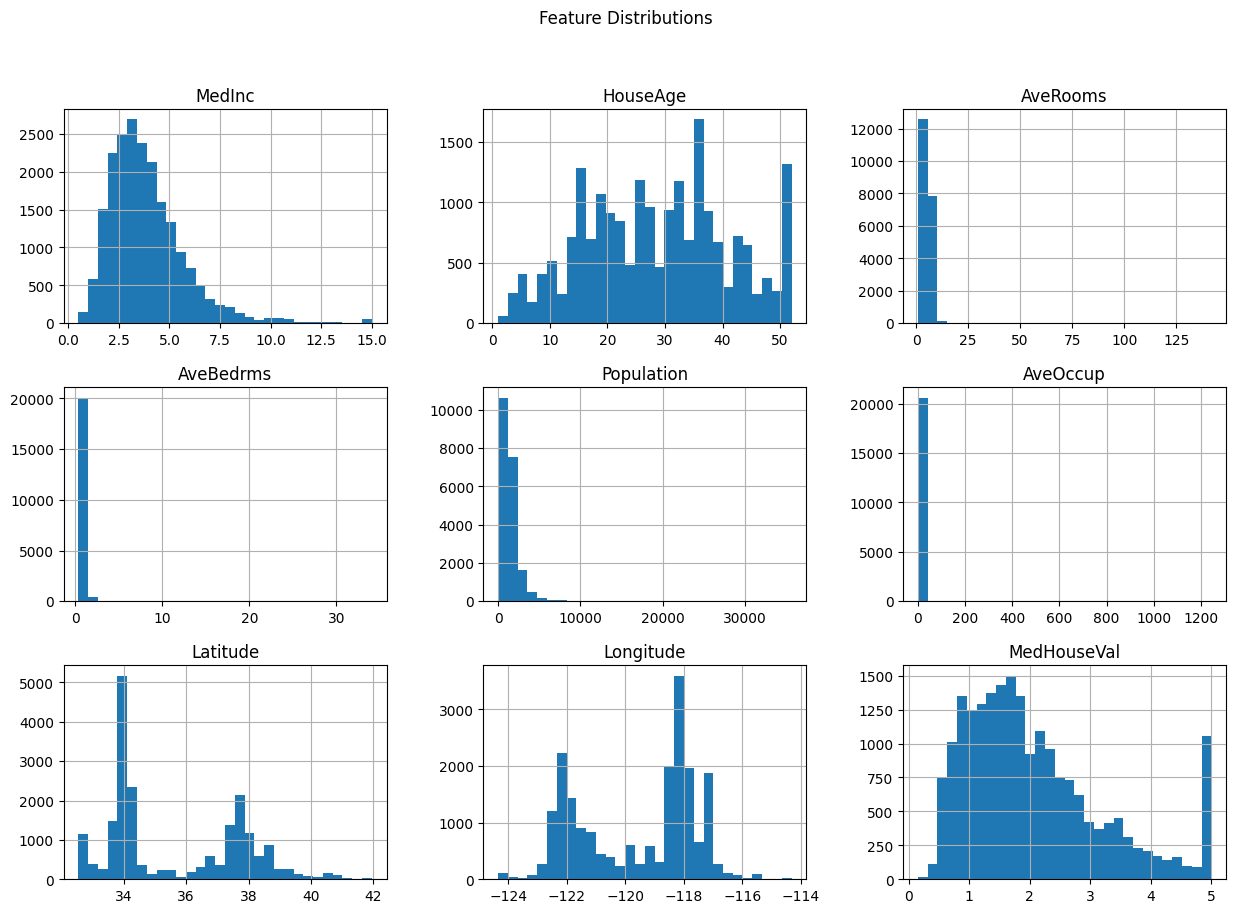

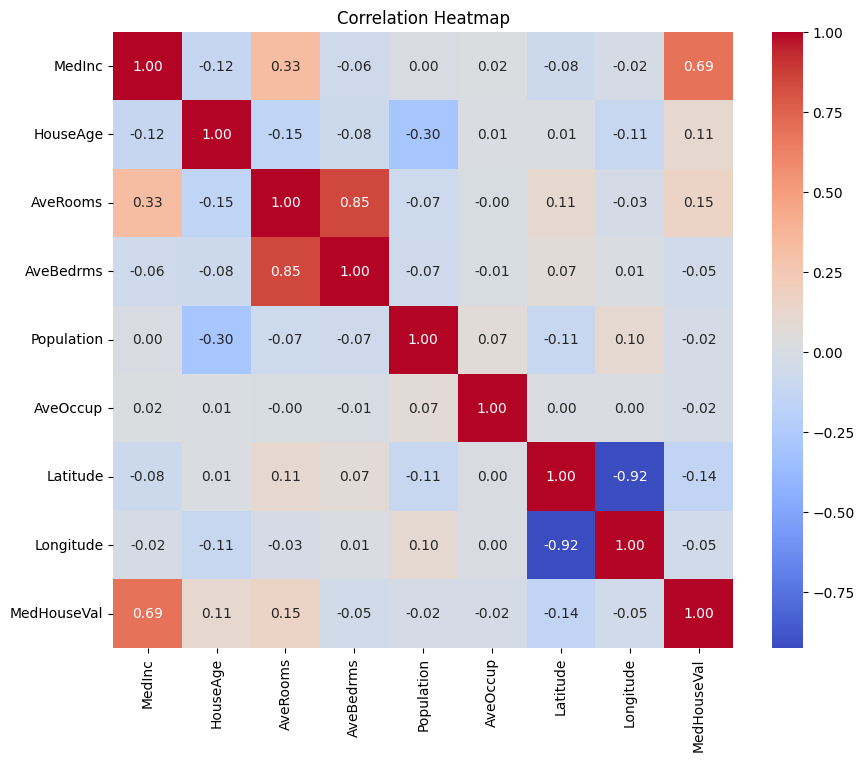

In [ ]:
# @title Exploratory data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

print(df.info())
print(df.describe())

df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
# @title Data Preperation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# @title Modelling

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_model.predict(X_test_scaled)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

print("\nRandom Forest:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")


Linear Regression:
Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451

Random Forest:
Mean Squared Error: 0.255553781221915
R-squared: 0.804981661858749


In [ ]:
# @title Validation

from sklearn.model_selection import cross_val_score

lr_cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Linear Regression CV R-squared: {lr_cv_scores.mean()}")

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest CV R-squared: {rf_cv_scores.mean()}")


Linear Regression CV R-squared: 0.6114839952560993
Random Forest CV R-squared: 0.8042224332935659


In [ ]:
# @title Feature Importance
import numpy as np
from sklearn.feature_selection import RFE

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_model.coef_
}).sort_values(by="Coefficient", ascending=False)
print("Feature Importance (Linear Regression):")
print(coefficients)

rf_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance (Random Forest):")
print(rf_feature_importance)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
selected_features = X.columns[rfe.support_]
print("\nSelected Features with RFE:")
print(selected_features)

Feature Importance (Linear Regression):
      Feature  Coefficient
0      MedInc     0.854383
3   AveBedrms     0.339259
1    HouseAge     0.122546
4  Population    -0.002308
5    AveOccup    -0.040829
2    AveRooms    -0.294410
7   Longitude    -0.869842
6    Latitude    -0.896929

Feature Importance (Random Forest):
      Feature  Importance
0      MedInc    0.524879
5    AveOccup    0.138447
6    Latitude    0.088952
7   Longitude    0.088630
1    HouseAge    0.054611
2    AveRooms    0.044277
4  Population    0.030613
3   AveBedrms    0.029591

Selected Features with RFE:
Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')
